In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [3]:
weeks_data = [1, 2, 3, 4, 5]
sales_data = [2, 4, 5, 4, 5]

df = pd.DataFrame({'weeks':weeks_data,'sales':sales_data})
df

,weeks,sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [4]:
X= df['weeks'].values
Y= df['sales'].values

In [5]:
mean_x= np.mean(X)
mean_y = np.mean(Y)

n = len(X)

numer = 0
denom = 0

for i in range (n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x)**2

m = numer/denom

c = mean_y - (m*mean_x)

print(f"m: {m} ")
print(f"c: {c} ")

m: 0.6 
c: 2.2 


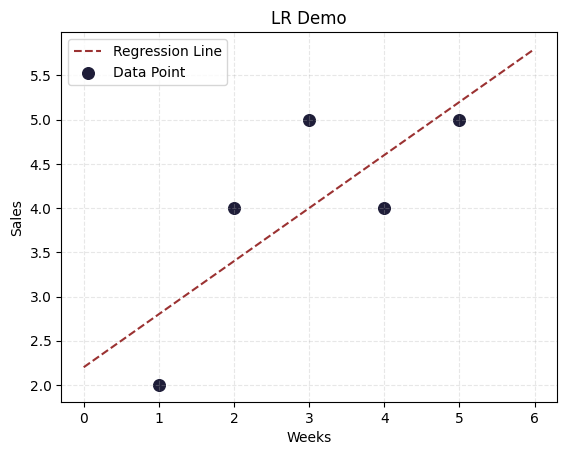

In [6]:
#plot
max_x = np.max(X) +1
min_x = np.min(X) -1

x = np.linspace(min_x, max_x)
y = (m*x) + c

plt.plot(x,y,color="#9B3232",label= "Regression Line", linestyle='--')
plt.scatter(X,Y, color="#1E1D38",label='Data Point', s=70)
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('LR Demo')
plt.grid(True,alpha=0.3,linestyle='--')
plt.legend(loc='best')

In [7]:
#r^2

ss_tot = 0
ss_res = 0

for i in range(n):
    y_pred = ( m* X[i]) + c
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2

r2 = 1- (ss_res/ss_tot)
print(f"r2 : {r2} ")

r2 : 0.6000000000000001 


In [8]:
# validate
from sklearn.linear_model import LinearRegression

In [9]:
x =X.reshape((n,1))

In [10]:
x 

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [11]:
reg = LinearRegression()
reg = reg.fit(x,Y)

In [12]:
R2 = reg.score(x,Y)
R2

0.6000000000000001

WITH DATASET

In [26]:
# import all other libries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
#Load Dataset
data = pd.read_csv("./headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [15]:
data['Gender'].value_counts() # Categorical data = data divided into groups or classes (here 1,2)

Gender
1    134
2    103
Name: count, dtype: int64

In [16]:
data['Age Range'].value_counts() # Categorical data = data divided into groups or classes (here 1,2)

Age Range
2    127
1    110
Name: count, dtype: int64

In [17]:
data.describe() # Head size and brain weight are continuous numeric


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


# Target Type vs Model Type

- **Target continuous → Linear Regression**
- **Target categorical → Classification**

---

# Data Types in Machine Learning

There are **two main types** of data:
1. Numeric (Numerical)
2. Categorical

---

# 1. Numeric (Numerical Data)

Numeric data is any data represented in numbers.

It has **two types**:
- Discrete  
- Continuous  

**Continuous is a type of numeric data**

---

## 1.1 Discrete Numeric Data

Countable values (usually whole numbers).

**Examples:**
- Number of students = 50  
- Number of cars = 10  
- Goals scored = 3  
- Number of orders  

Discrete data cannot take decimal values between counts.

---

## 1.2 Continuous Numeric Data

Can take **any value** within a range (including decimals).

**Examples:**
- Height = 170.5 cm  
- Weight = 65.2 kg  
- Temperature = 36.7°C  
- Time = 2.35 sec  
- Salary  
- House price  

Continuous data is used in **Linear Regression**.

---

# 2. Categorical Data

Categorical data represents **labels, groups, or classes**.

You cannot perform mathematical operations directly on it.

**Examples:**
- Gender → Male/Female  
- Color → Red/Blue/Green  
- City → Delhi/Mumbai  
- Yes/No  
- Pass/Fail  

---

## Types of Categorical Data

### 2.1 Nominal (No order)
Categories have **no ranking**.

Examples:
- Color  
- City  
- Gender  

### 2.2 Ordinal (Has order)
Categories have a **specific order**.

Examples:
- Low < Medium < High  
- Small < Medium < Large  
- Rank 1, 2, 3  

---

# Overall Structure

```
Data
├── Numeric
│ ├── Discrete
│ └── Continuous
│
└── Categorical
├── Nominal
└── Ordinal
```


In [19]:
data.shape

(237, 4)

In [20]:
data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [22]:
X= data['Head Size(cm^3)'].values
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [24]:
Y = data['Brain Weight(grams)'].values
Y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [29]:
X.shape

(237,)

In [54]:
X = X.reshape(-1,1)
X.ndim

2

In [55]:
X.shape
X

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982],
       [3443],
       [3993],
       [3640],
       [4208],
       [3832],
       [3876],
       [3497],
       [3466],
       [3095],
       [4424],
       [3878],
       [4046],
       [3804],
       [3710],
       [4747],
       [4423],
       [4036],
       [4022],
       [3454],
       [4175],
       [3787],
       [3796],
       [4103],
       [4161],
       [4158],
       [3814],
       [3527],
       [3748],
       [3334],
       [3492],
       [3962],
       [3505],
       [4315],
       [3804],
       [3863],
       [4034],
       [4308],
       [3165],
       [3641],
       [3644],
       [3891],
       [3793],
       [4270],
       [4063],
       [4012],
       [3458],
       [3890],
       [4166],
       [3935],
       [3669],
       [3866],
       [3393],
       [4442],
       [4253],
       [3727],
       [3329],
       [34

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [58]:
# train_test_split explain
def some_random_function(a,b):
    return (a+b,a-b,a*b,a/b)

some_random_function(4,5)

(9, -1, 20, 0.8)

In [60]:
add,sub,mul,div = some_random_function(4,5)
add

9

In [61]:
sub

-1

In [62]:

mul

20

In [63]:
div

0.8

In [72]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
y_pred = lr.predict(X_test)

In [ ]:
r2 = r2_score(Y_test,y_pred)
r2

#R2 is low because the dataset has outliers that affect the linear relationship.

0.5327357086142375

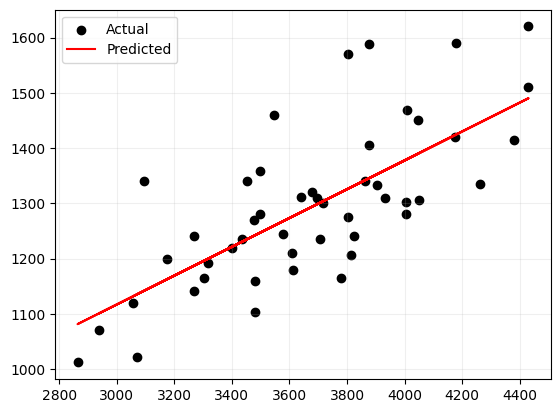

In [75]:
plt.scatter(X_test,Y_test,color="black",label="Actual")
plt.plot(X_test,y_pred,color='red',label='Predicted')
plt.legend()
plt.grid(True,alpha=0.2)


In [76]:
lr.predict([[4177]])

array([1424.0571511])